# Предсказание вероятности возникновения сердечного приступа на основе датасета Kaggle

## Описание полей

* age - возраст пациента
* sex - пол пациента (0 = муж; 1 = жен)
* exang - стенокардия (клинический синдром, проявляющийся чувством стеснения или сжимающей давящей болью в грудной клетке), вызванная физической нагрузкой (1 = да; 0 = нет)
* ca - количество крупных сосудов у пациента (0-3)
* cp - тип боли в груди (1 = типичная стенокардия; 2 = атипичная стенокардия; 3 = неангинозная боль; 4 = бессимптомный)
* trtbps - артериальное давление в покое (в мм рт. ст.)
* chol - холестерин в мг/дл, полученный с помощью датчика ИМТ
* fbs - (уровень сахара в крови натощак > 120 мг/дл) (1 = да; 0 = нет)
* restecg - результаты электрокардиографии в покое (0 = норма; 1 = наличие аномалии ST-T (инверсия зубца T и/или элевация или депрессия ST > 0,05 мВ); 2 = указание на возможную или определенную гипертрофию левого желудочка по критериям Эстеса)
* thalach - максимально достигнутая частота сердечных сокращений пациента

Target: 0 = низкая вероятность возникновения сердечного приступа; 1 = высокая вероятность возникновения сердечного приступа

## Импорты библиотек

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
sns.set_context("poster")
warnings.filterwarnings("ignore")

## Чтение данных

### Получение данных из файла

In [94]:
df = pd.read_csv("heart.csv", delimiter=",")
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### Информация о размерах таблицы

In [95]:
print("Число строк: ", df.shape[0])
print("Число колонок: ", df.shape[1])

Число строк:  303
Число колонок:  14


### Число null значений в датасете по колонкам

In [96]:
print(round(df.isnull().sum() * 100/df.shape[0]))

age         0.0
sex         0.0
cp          0.0
trtbps      0.0
chol        0.0
fbs         0.0
restecg     0.0
thalachh    0.0
exng        0.0
oldpeak     0.0
slp         0.0
caa         0.0
thall       0.0
output      0.0
dtype: float64


## Поиск аномалий в данных

### Описание колонок и прецентилей для поиска потенциальных выбросов

In [97]:
df.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.98,0.99])

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
90%,66.000000,1.000000,2.000000,152.000000,308.800000,1.000000,1.000000,176.600000,1.000000,2.800000,2.000000,2.000000,3.000000,1.000000
95%,68.000000,1.000000,3.000000,160.000000,326.900000,1.000000,1.000000,181.900000,1.000000,3.400000,2.000000,3.000000,3.000000,1.000000
98%,70.000000,1.000000,3.000000,177.840000,353.960000,1.000000,1.000000,186.960000,1.000000,4.000000,2.000000,3.000000,3.000000,1.000000


### Выбросы в колонке "Возраст"

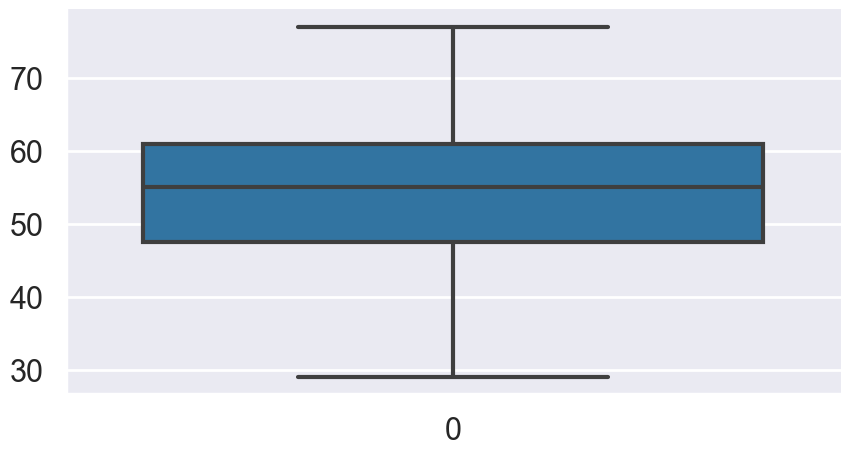

In [98]:
plt.figure(figsize=[10, 5])
sns.boxplot(df['age'])
sns.despine()
plt.show()

### Кто больше подвержен риску относительно пола

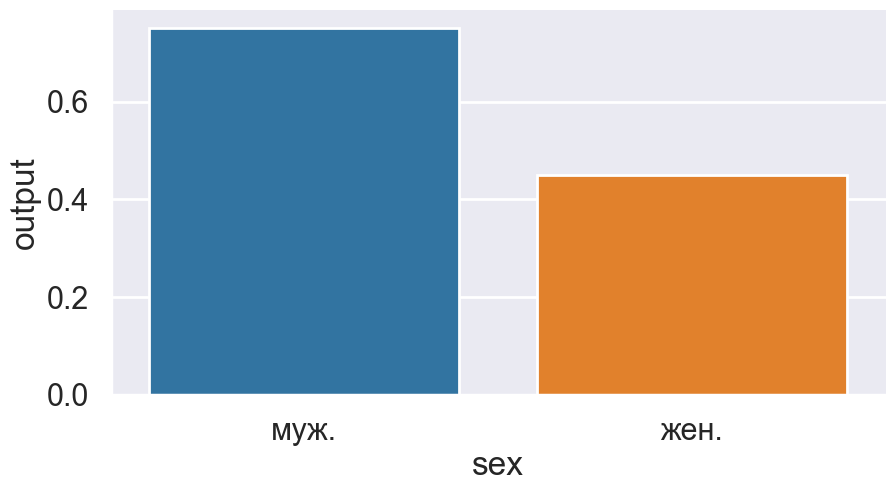

In [99]:
plt.figure(figsize=[10,5])
sns.barplot(x = df["sex"], y = df["output"], ci=0)
plt.xticks(ticks=[0,1], labels=['муж.','жен.'])
sns.despine()
plt.show()

### Наличие выбросов в показателях артериального давления

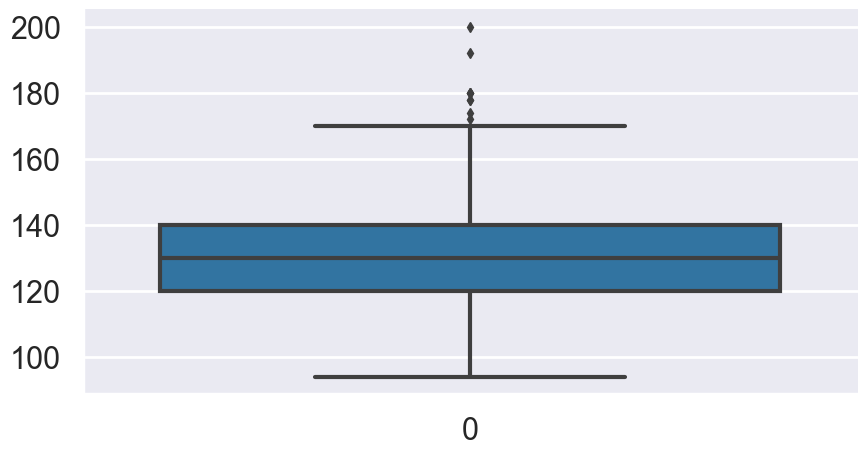

In [100]:
plt.figure(figsize=[10,5])
sns.boxplot(df["trtbps"])
sns.despine()
plt.show()

In [101]:
Q3 = df["trtbps"].quantile(0.99)
df = df[df["trtbps"] <= Q3]

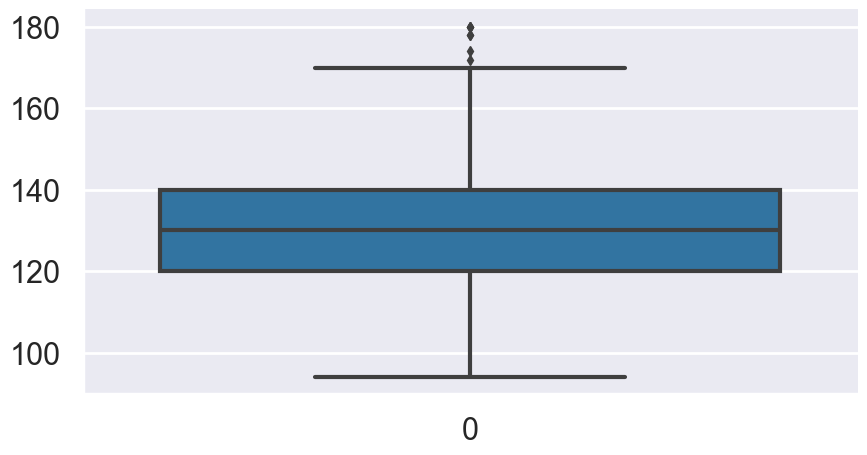

In [102]:
plt.figure(figsize=[10,5])
sns.boxplot(df["trtbps"])
sns.despine()
plt.show()

### Наличие выбросов в показателях холестерина

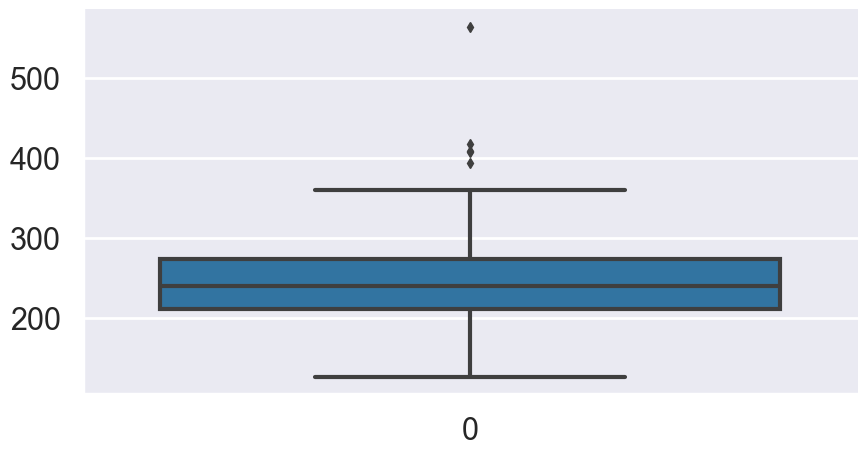

In [103]:
plt.figure(figsize=[10,5])
sns.boxplot(df["chol"])
sns.despine()
plt.show()

В случае с холестерином есть слишком большой выброс, который имеет смысл удалить

In [104]:
Q3 = df["chol"].quantile(0.99)
df = df[df["chol"] <= Q3]

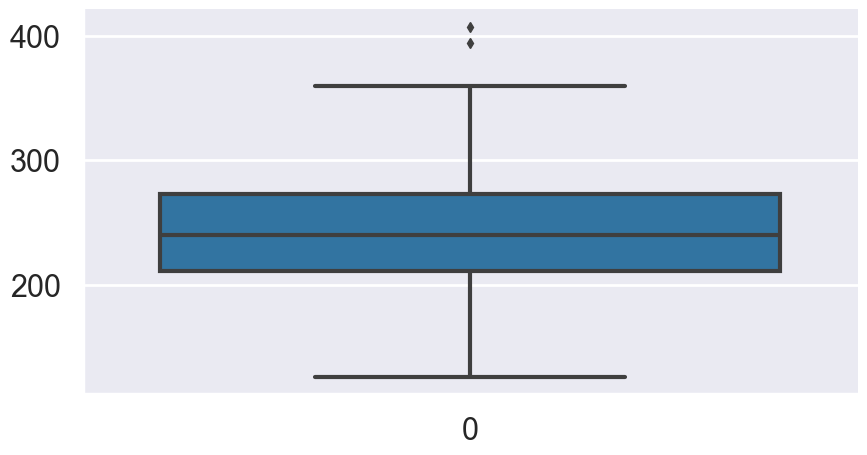

In [105]:
plt.figure(figsize=[10,5])
sns.boxplot(df["chol"])
sns.despine()
plt.show()

### Оцениваем риск в зависимости от высокого уровня сахара

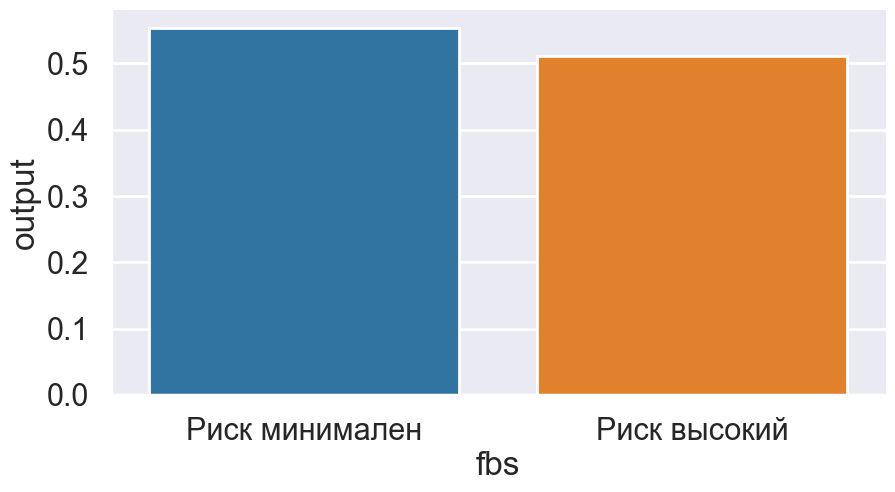

In [106]:
plt.figure(figsize=[10,5])
sns.barplot(x = df["fbs"], y = df["output"], ci=0)
plt.xticks(ticks=[0,1], labels=['Риск минимален','Риск высокий'])
sns.despine()
plt.show()

Существенных отличий в колонках нет

### Проверка выбросов в показателях ЭКГ

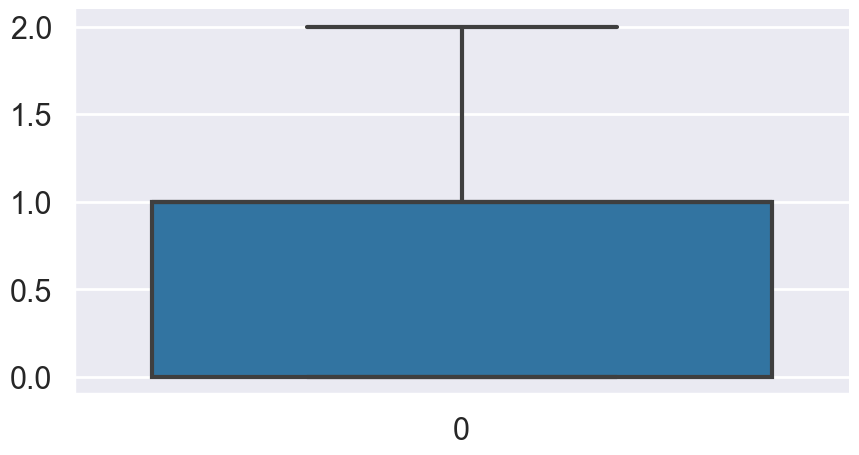

In [107]:
plt.figure(figsize=[10,5])
sns.boxplot(df["restecg"])
sns.despine()
plt.show()

### Поиск выбросов в показателях максимально достигнутых АД

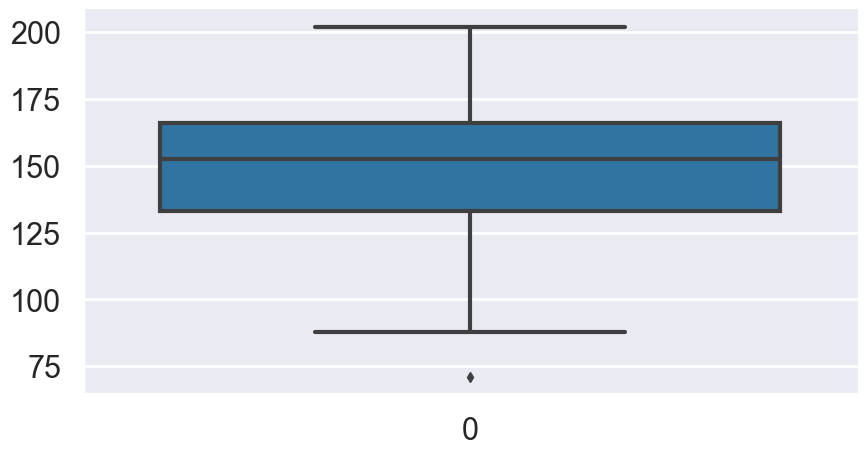

In [108]:
plt.figure(figsize=[10,5])
sns.boxplot(df["thalachh"])
sns.despine()
plt.show()

### Оценка зависимости риска от стенокардии

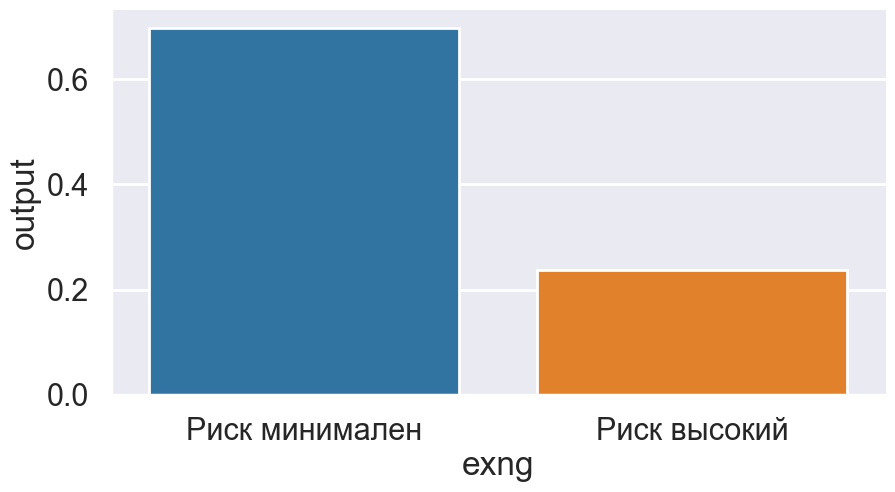

In [109]:
plt.figure(figsize=[10,5])
sns.barplot(x = df["exng"], y = df["output"], ci=0)
plt.xticks(ticks=[0,1], labels=['Риск минимален','Риск высокий'])
sns.despine()
plt.show()

Риск сердечного приступа из-за стенокардии минимален

### Поиск выбросов в показателях средечной наргрузки после физических упражнений (oldpeak)

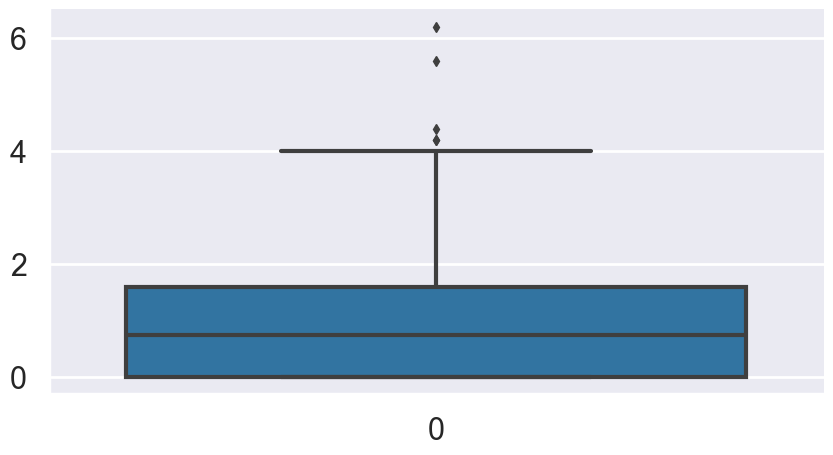

In [110]:
plt.figure(figsize=[10,5])
sns.boxplot(df["oldpeak"])
sns.despine()
plt.show()

In [111]:
Q3 = df["oldpeak"].quantile(0.99)
df = df[df["oldpeak"] <= Q3]

## Построение модели

In [112]:
y = df.pop("output")
X = df

## Разбиение данных на обучающие и тестовые в отношении 80% к 20%

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 42)

In [114]:
X_train.shape, y_train.shape

((236, 13), (236,))

## Формирование дерева классификации

In [115]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10,
                       random_state=42)

## Обучение модели

In [116]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

### Матрица оценки качества модели

In [117]:
print("Матрица ошибок для тренировочного сета:\n")
print(confusion_matrix(y_train, y_train_pred))
print("Матрица ошибок для тестового сета:\n")
print(confusion_matrix(y_test, y_test_pred))

Матрица ошибок для тренировочного сета:

[[ 90  14]
 [ 19 113]]
Матрица ошибок для тестового сета:

[[22  6]
 [ 8 23]]


## Оценка показателей качества модели

### Accuracy — доля правильных ответов алгоритма

In [118]:
print(str(accuracy_score(y_test, y_test_pred)))

0.7627118644067796


### Precision - доля объектов, названных классификатором положительными и при этом действительно являющимися положительными

In [119]:
print(str(precision_score(y_test, y_test_pred)))

0.7931034482758621


### Recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.

In [120]:
print(str(recall_score(y_test, y_test_pred)))

0.7419354838709677


## Визуализация полученного дерева

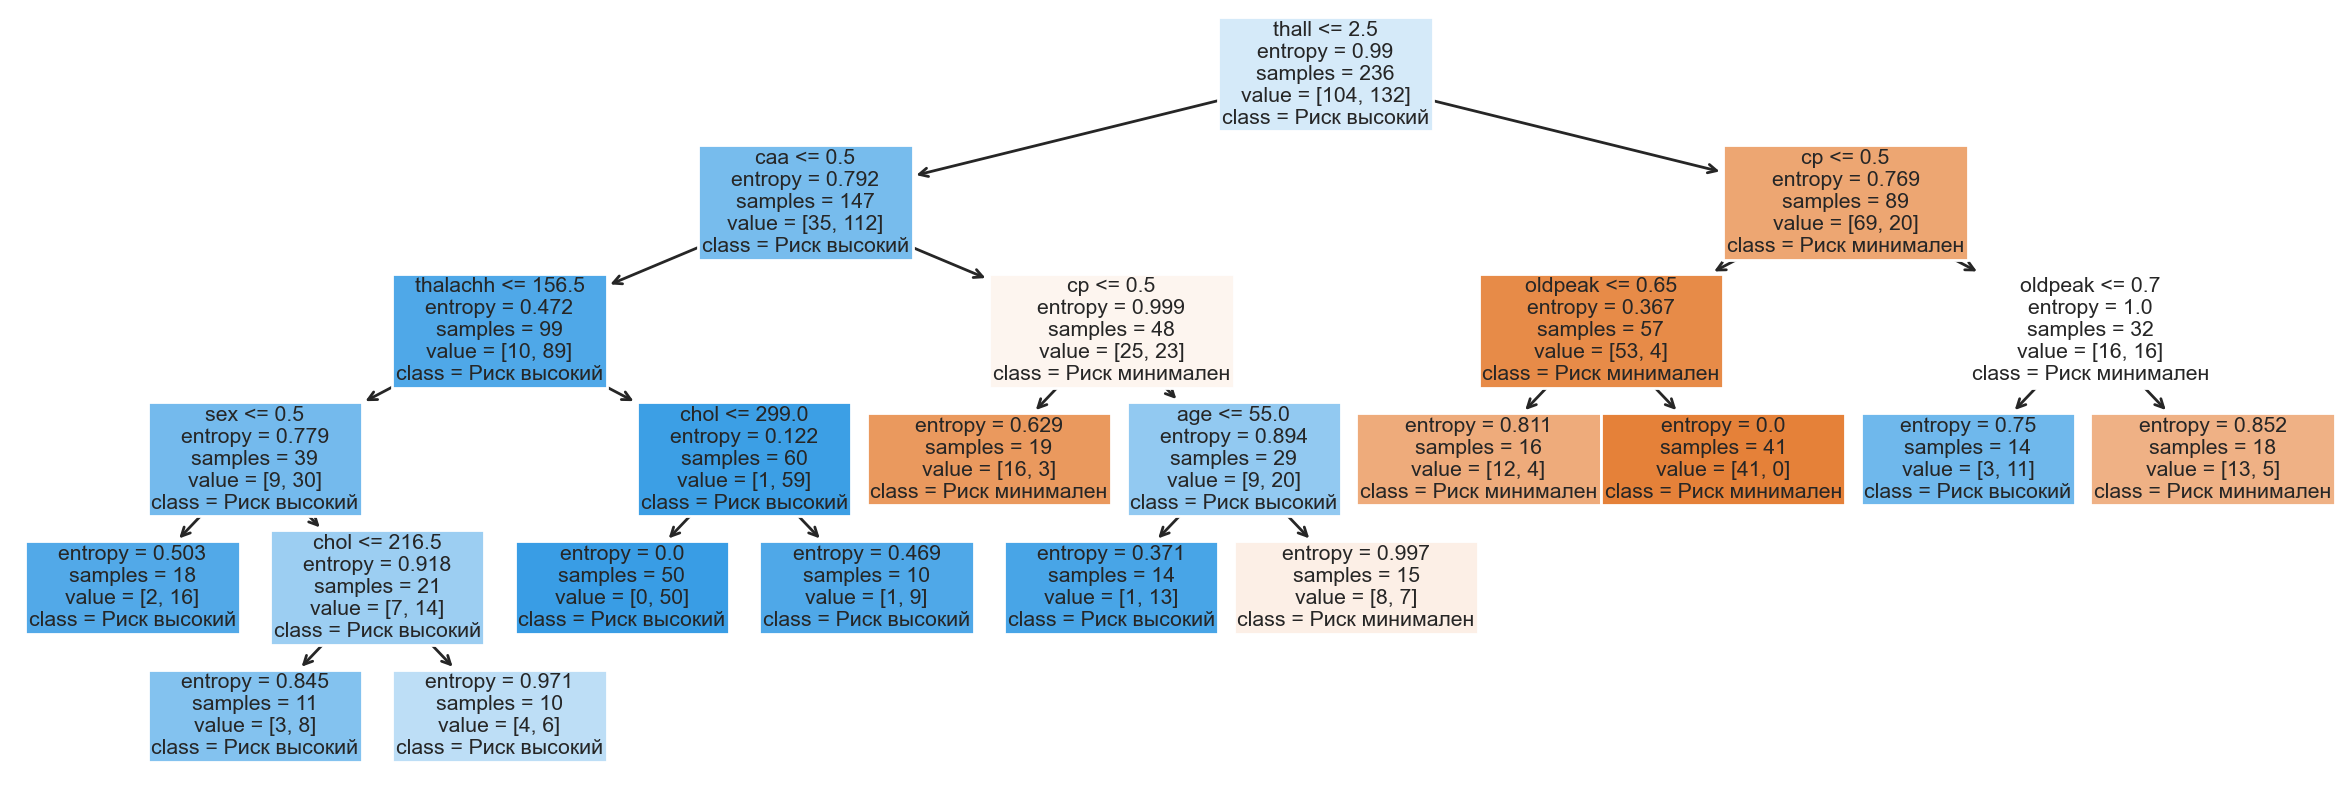

In [121]:
plt.figure(figsize=(30,10))
plot_tree(dt, feature_names = X.columns, class_names=['Риск минимален', "Риск высокий"], filled=True);

* У человека независимо от пола, скорее всего, случится сердечный приступ, если уровень боли в груди равен 1 или выше.
* Даже если боль в груди больше 1 или более, мужчины подвергаются большему риску, чем женщины.
* Кроме того, если частота сердечных сокращений больше в сочетании с болью в груди не менее 1 уровня, то у субъекта определенно будет сердечный приступ.
* Если уровень боли в груди ниже 1, даже в этом случае, если у субъекта есть стенокардия, вызванная физическими упражнениями, он/она подвергается большему риску сердечного приступа.